In [1]:
from ImageAlgoKD import *

## 1. Load Toy Data Points

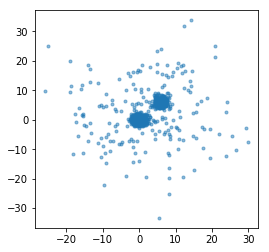

In [2]:
# read 1000 toy points
points = Points(np.genfromtxt("../data/basic.csv",delimiter=','))
# plot toy points
plt.figure(figsize=(4,4),facecolor="w")
plt.plot( points.cords[:,0],points.cords[:,1], ".",alpha=0.5 )

## 2. Define Clustering Parameters

In [9]:
# define clustering parameters
ia = ImageAlgoKD(MAXDISTANCE        = 20,
                 KERNEL_R           = 1.0,
                 KERNEL_R_NORM      = 1.0,
                 KERNEL_R_POWER     = 0.0,
                 DECISION_RHO_KAPPA = 5.0,
                 DECISION_NHD       = 2.0,
                 CONTINUITY_NHD     = 2.0)

ia.setInputsPoints(points)

## 3. Run and Plot Result

clustering finished!
Total time with opencl is 24.4055 ms


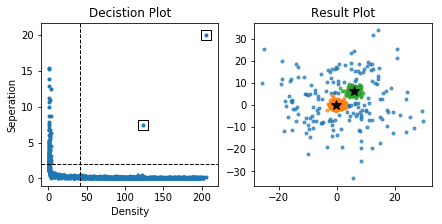

In [10]:
# run
ia.run("opencl")

# plot result
plt.figure(figsize=(7,3),facecolor="w")

plt.subplot(1,2,1)
x,y,slt = ia.points.rho, ia.points.nhd, ia.points.isSeed
plt.plot(x,y, ".")
plt.scatter( x[slt], y[slt], marker="s", s=100, facecolors='none', edgecolors="k")

plt.axvline(ia.DECISION_RHO,color='k',linestyle="--",linewidth=1)
plt.axhline(ia.DECISION_NHD,color='k',linestyle="--",linewidth=1)
plt.xlabel("Density")
plt.ylabel("Seperation")
plt.title("Decistion Plot")

plt.subplot(1,2,2)
for icluster in np.unique(ia.points.clusterID):
    sl = ia.points.clusterID==icluster
    x,y = ia.points.cords[sl,0],ia.points.cords[sl,1]
    plt.plot( x, y, ".",alpha=0.7)
x,y = ia.points.cords[slt,0],ia.points.cords[slt,1]
plt.plot( x, y, "k*", markersize=10)

plt.title("Result Plot")
plt.savefig("../plots/basic.png",dpi=300)

## 4. Check Opencl and Numpy Gives Consistent Result

In [13]:
ia.run("opencl",1,50)
gpu = ia.points.clusterID

ia.run("numpy",1,48)
cpu = ia.points.clusterID

identical = (gpu==cpu)
identical.all()

clustering finished!
Total time with opencl is 115.6843 ms
clustering finished!
Total time with numpy is 97.1192 ms


True